In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, HTML
%matplotlib inline

In [2]:
df = pd.read_csv('FocalSystemsAnalysisChallenge.csv')
df.columns=df.columns.str.strip()
df.dtypes

Timestamp                          object
Date                               object
UPC                                 int64
DSD                                  bool
Workable                             bool
Worked                               bool
Out of Stock Start                 object
Out of Stock End                   object
Out of Stock Duration             float64
Expected Out of Stock Duration    float64
Hours Recouped                    float64
Sales Per Hour                     object
Expected Lost Sales                object
Expected Workable Lost Sales       object
Recouped Sales                     object
dtype: object

In [3]:
#Changing date and timestamp fields from "object" type to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = pd.to_datetime(df['Date'])
df['Out of Stock Start'] = pd.to_datetime(df['Out of Stock Start'])
df['Out of Stock End'] = pd.to_datetime(df['Out of Stock End'])

/tmp/ipykernel_1587/2906764734.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
/tmp/ipykernel_1587/2906764734.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_1587/2906764734.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Out of Stock Start'] = pd.to_datetime(df['Out of Stock Start'])
/tmp/ipykernel_1587/2906764734.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consi

In [4]:
#Cleaning up the formatting of the sales-related data
df['Sales Per Hour'] = df['Sales Per Hour'].str.replace('$', '')
df['Expected Lost Sales'] = df['Expected Lost Sales'].str.replace('$', '')
df['Expected Workable Lost Sales'] = df['Expected Workable Lost Sales'].str.replace('$-', '0')
df['Expected Workable Lost Sales'] = df['Expected Workable Lost Sales'].str.replace('$', '')
df['Recouped Sales'] = df['Recouped Sales'].str.replace('$-', '0')
df['Recouped Sales'] = df['Recouped Sales'].str.replace('$', '')
df['Recouped Sales'] = df['Recouped Sales'].str.replace(')', '')
df['Recouped Sales'] = df['Recouped Sales'].str.replace('(', '-')

In [5]:
#Making the sales-related data float
df['Sales Per Hour']=df['Sales Per Hour'].astype(float)
df['Expected Lost Sales']=df['Expected Lost Sales'].astype(float)
df['Expected Workable Lost Sales']=df['Expected Workable Lost Sales'].astype(float)
df['Recouped Sales']=df['Recouped Sales'].astype(float)

In [6]:
print(df.dtypes)
df.head()

Timestamp                         datetime64[ns]
Date                              datetime64[ns]
UPC                                        int64
DSD                                         bool
Workable                                    bool
Worked                                      bool
Out of Stock Start                datetime64[ns]
Out of Stock End                  datetime64[ns]
Out of Stock Duration                    float64
Expected Out of Stock Duration           float64
Hours Recouped                           float64
Sales Per Hour                           float64
Expected Lost Sales                      float64
Expected Workable Lost Sales             float64
Recouped Sales                           float64
dtype: object


,Timestamp,Date,UPC,DSD,Workable,Worked,Out of Stock Start,Out of Stock End,Out of Stock Duration,Expected Out of Stock Duration,Hours Recouped,Sales Per Hour,Expected Lost Sales,Expected Workable Lost Sales,Recouped Sales
0,2019-01-01 06:31:00,2019-01-01,7943675883,True,True,True,2019-01-01 06:31:00,2019-01-01 20:33:00,14.03,16.48,2.45,2.55,42.03,42.03,6.25
1,2019-01-01 06:31:00,2019-01-01,7393548538,True,True,True,2019-01-01 06:31:00,2019-01-01 20:33:00,14.03,16.48,2.45,0.81,13.35,13.35,1.98
2,2019-01-01 06:31:00,2019-01-01,6394853337,False,True,False,2019-01-01 06:31:00,2019-01-01 23:00:00,16.48,16.48,0.00,4.58,75.49,75.49,0.00
3,2019-01-01 06:31:00,2019-01-01,3219980884,True,True,True,2019-01-01 06:31:00,2019-01-01 12:28:00,5.96,16.48,10.52,5.99,98.73,98.73,63.01
4,2019-01-01 06:31:00,2019-01-01,2572960196,True,True,False,2019-01-01 06:31:00,2019-01-01 23:00:00,16.48,16.48,0.00,5.44,89.66,89.66,0.00


In [6]:
#Pulling Out of Stock (OOS) events by date and workable / worked classification
df_oos_events_groupby = df.groupby(['Date','Workable','Worked'])['UPC'].count().reset_index(name='UPC Count')
display(HTML(df_oos_events_groupby.to_html()))

In [7]:
#Looking at start of OOS events by hour and day of week
df['Day_of_Week_Number'] = df['Date'].dt.weekday
df['Day_of_Week_Name'] = df['Date'].dt.day_name()
df['Day_of_Week'] = df['Day_of_Week_Number'].astype(str) + ' ' + df['Day_of_Week_Name']
df['OOS_Hour_Start'] = df['Out of Stock Start'].dt.hour
#dropping the records for 3 am hour as there are very few of them - keeping 6 am - 10 pm hours
df_oos_times = df
df_oos_times = df_oos_times[df_oos_times.OOS_Hour_Start > 3]

df_oos_times_groupby = df_oos_times.groupby(['Day_of_Week','OOS_Hour_Start'])['UPC'].count().reset_index(name='UPC Count')
df_oos_times_pivot = pd.pivot_table(df_oos_times_groupby, values='UPC Count', index='OOS_Hour_Start', columns='Day_of_Week', fill_value=0)
display(HTML(df_oos_times_pivot.to_html()))

,Timestamp,Date,UPC,DSD,Workable,Worked,Out of Stock Start,Out of Stock End,Out of Stock Duration,Expected Out of Stock Duration,Hours Recouped,Sales Per Hour,Expected Lost Sales,Expected Workable Lost Sales,Recouped Sales,Day_of_Week_Number,Day_of_Week_Name,Day_of_Week,OOS_Hour_Start
0,2019-01-01 06:31:00,2019-01-01,7943675883,True,True,True,2019-01-01 06:31:00,2019-01-01 20:33:00,14.03,16.48,2.45,2.55,42.03,42.03,6.25,1,Tuesday,1 Tuesday,6
1,2019-01-01 06:31:00,2019-01-01,7393548538,True,True,True,2019-01-01 06:31:00,2019-01-01 20:33:00,14.03,16.48,2.45,0.81,13.35,13.35,1.98,1,Tuesday,1 Tuesday,6
2,2019-01-01 06:31:00,2019-01-01,6394853337,False,True,False,2019-01-01 06:31:00,2019-01-01 23:00:00,16.48,16.48,0.00,4.58,75.49,75.49,0.00,1,Tuesday,1 Tuesday,6
3,2019-01-01 06:31:00,2019-01-01,3219980884,True,True,True,2019-01-01 06:31:00,2019-01-01 12:28:00,5.96,16.48,10.52,5.99,98.73,98.73,63.01,1,Tuesday,1 Tuesday,6
4,2019-01-01 06:31:00,2019-01-01,2572960196,True,True,False,2019-01-01 06:31:00,2019-01-01 23:00:00,16.48,16.48,0.00,5.44,89.66,89.66,0.00,1,Tuesday,1 Tuesday,6


In [10]:
#Looking at which UPCs have OOS events
#How many times do UPCs have multiple OOS events on a single day?
df_oos_upc_groupby_dates = df.groupby(['Date', 'UPC'])['UPC'].count().reset_index(name='Daily OOS Events')
df_oos_upc_groupby_dates.describe()
#since the observed maximum number of times a UPC goes out of stock on a single day is 2, 
#I'm going to ignore individual OOS event counts and look at days with an OOS event

df_oos_upc_groupby_detailed = df.groupby(['UPC','Workable','Worked']).agg(
    Days_OOS_Events = ('Date','count'),
    Total_Expected_Lost_Sales = ('Expected Lost Sales','sum'),
    Total_Expected_Workable_Lost_Sales = ('Expected Workable Lost Sales','sum'),
    Total_Recouped_Sales = ('Recouped Sales','sum'),
    ).reset_index()
df_oos_upc_groupby_detailed.head(10)

#Finding the top 50 records of UPCs with most days with *non-workable* OOS events (want to ultimately report ~10 UPCs, but want to respect ties)
#Non-Workable OOS events suggest UPCs that should be removed from the shelves entirely, with space reallocated to available products
#Ideally would rank by "shelf space consumed", but using UPC count as measure available from data
df_nonworkable_oos_upc = df_oos_upc_groupby_detailed[['UPC','Workable','Days_OOS_Events']]
df_nonworkable_oos_upc = df_nonworkable_oos_upc[df_nonworkable_oos_upc.Workable == False]
df_nonworkable_oos_upc = df_nonworkable_oos_upc.sort_values(by=['Days_OOS_Events'], ascending=False)
df_nonworkable_oos_upc.head(50)

#Finding the top 50 records of UPCs with most days with *workable* OOS events (want to ultimately report ~10 UPCs, but want to respect ties)
#Workable OOS events identify UPCs where stockers should focus their efforts
#Ordering by Expected Workable Lost Sales to keep the focus on the products where the most money has been lost by empty shelves
df_workable_oos_upc = df_oos_upc_groupby_detailed[['UPC','Workable','Days_OOS_Events','Total_Expected_Workable_Lost_Sales']]
df_workable_oos_upc = df_workable_oos_upc[df_workable_oos_upc.Workable == True]
df_workable_oos_upc = df_workable_oos_upc.sort_values(by=['Total_Expected_Workable_Lost_Sales'], ascending=False)
df_workable_oos_upc.head(50)

,Date,Total_Expected_Lost_Sales,Total_Expected_Workable_Lost_Sales,Total_Recouped_Sales
0,2019-01-01,14001.45,8230.18,2034.44
1,2019-01-02,20224.94,13542.48,4569.46
2,2019-01-03,17320.92,11913.18,3699.14
3,2019-01-04,21929.37,14194.41,5031.27
4,2019-01-05,21222.98,14482.72,4843.00
5,2019-01-06,25069.23,18051.44,5946.34
6,2019-01-07,26698.09,17957.26,7250.46
7,2019-01-08,17451.36,11339.96,3816.84
8,2019-01-09,16420.36,9343.42,3227.16
9,2019-01-10,15248.58,10237.13,3996.48


,UPC,Workable,Days_OOS_Events,Total_Expected_Workable_Lost_Sales
368,1680941522,True,14,1239.53
3101,6153896439,True,13,1127.50
1354,3283147032,True,15,1029.76
649,2138337886,True,16,988.03
1286,3182351553,True,12,976.56
4608,8532259398,True,14,973.39
4997,9135335262,True,13,936.85
4011,7602389686,True,18,927.38
5510,9937721191,True,12,894.36
819,2414205176,True,12,869.08


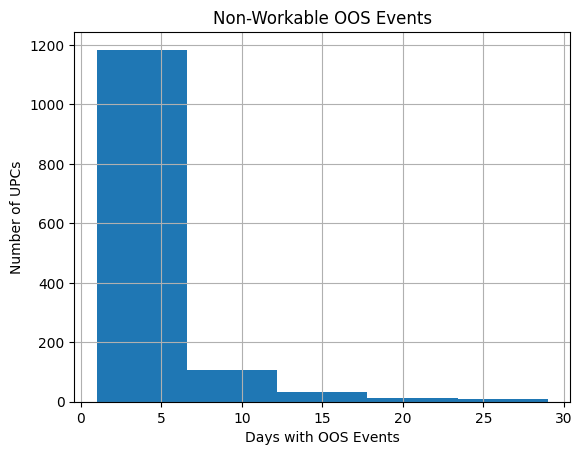

In [11]:
#Histogram of number of UPCs by number of days with *non-workable* Out of Stock Events
nonworkable_df = df_nonworkable_oos_upc[['Days_OOS_Events']]
nonworkable_df.hist(bins=5)
plt.ylabel('Number of UPCs')
plt.xlabel('Days with OOS Events')
plt.title("Non-Workable OOS Events")
plt.show()

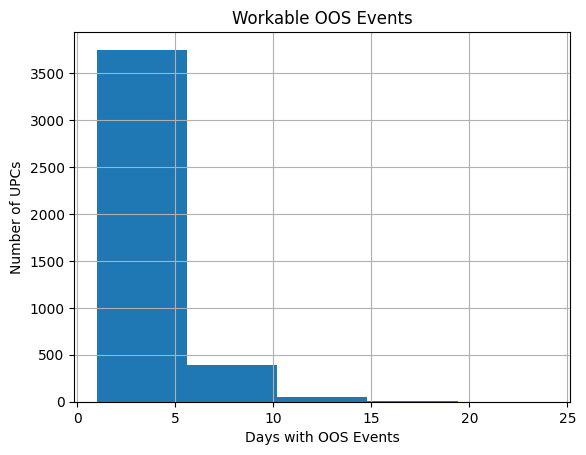

In [12]:
#Histogram of number of UPCs by number of days with *workable* Out of Stock Events
workable_df = df_workable_oos_upc[['Days_OOS_Events']]
workable_df.hist(bins=5)
plt.ylabel('Number of UPCs')
plt.xlabel('Days with OOS Events')
plt.title("Workable OOS Events")
plt.show()

In [14]:
#Binning *non-workable* OOS events to see distribution of UPCs by number of days with OOS events
#Want to recreate Python histogram in Google Sheet charts where I can finesse the formatting more easily
bins = np.linspace(1, 31, 6)
group_names = ['1-7 Days', '8-13 Days', '14-19 Days', '20-25 Days', '26-31 Days']
df_nonworkable_oos_upc['Nonworkable_Binned'] = pd.cut(df_nonworkable_oos_upc['Days_OOS_Events'], bins, labels=group_names, include_lowest=True)
df_nonworkable_binned_groupby = df_nonworkable_oos_upc.groupby(['Nonworkable_Binned'])['UPC'].count().reset_index(name='UPC Count')
df_nonworkable_binned_groupby.head()

/tmp/ipykernel_1264/1218802162.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nonworkable_binned_groupby = df_nonworkable_oos_upc.groupby(['Nonworkable_Binned'])['UPC'].count().reset_index(name='UPC Count')


,Nonworkable_Binned,UPC Count
0,1-7 Days,1212
1,8-13 Days,83
2,14-19 Days,34
3,20-25 Days,9
4,26-31 Days,8


In [15]:
#Binning *workable* OOS events to see distribution of UPCs by number of days with OOS events
#Want to recreate Python histogram in Google Sheet charts where I can finesse the formatting more easily
df_workable_oos_upc['Workable_Binned'] = pd.cut(df_workable_oos_upc['Days_OOS_Events'], bins, labels=group_names, include_lowest=True)
df_workable_binned_groupby = df_workable_oos_upc.groupby(['Workable_Binned'])['UPC'].count().reset_index(name='UPC Count')
df_workable_binned_groupby.head()

/tmp/ipykernel_1264/1466634184.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_workable_binned_groupby = df_workable_oos_upc.groupby(['Workable_Binned'])['UPC'].count().reset_index(name='UPC Count')


,Workable_Binned,UPC Count
0,1-7 Days,4004
1,8-13 Days,179
2,14-19 Days,20
3,20-25 Days,1
4,26-31 Days,0


In [9]:
#Seeing range of values for the Sales Per Hour field
minSales = df['Sales Per Hour'].min()
maxSales = df['Sales Per Hour'].max()
print("Minimum Sales Per Hour is ", minSales)
print("Maximum Sales Per Hour is ", maxSales)

Minimum Sales Per Hour is  0.5
Maximum Sales Per Hour is  6.0


In [7]:
#Binning Sales Per Hour into dollar buckets
#Given the $0.50 - $6 range of Sales Per Hour column, grouping by dollar increments more appealing for presentation
df_sales = df[['Date','UPC','Worked','Sales Per Hour','Expected Out of Stock Duration','Hours Recouped']]
df_sales = df_sales[df_sales.Worked == True]
bins = np.linspace(0, 6, 7)
group_names = ['$0.01-$1', '$1.01-$2', '$2.01-$3', '$3.01-$4', '$4.01-$5', '$5.01-$6']
df_sales['Binned_SalesPerHour']=pd.cut(df_sales['Sales Per Hour'], bins, labels=group_names, include_lowest=True)
df_sales_groupby = df_sales.groupby(['Binned_SalesPerHour'])['UPC'].count().reset_index(name='UPC Count')

#By dollar binning increment, getting count of OOS events and sum of total hours recouped
df_sales_groupby_detailed = df_sales.groupby(['Binned_SalesPerHour']).agg(
    OOS_Events = ('Date','count'),
    Total_Expected_OOS_Duration = ('Expected Out of Stock Duration','sum'),
    Total_Hours_Recouped = ('Hours Recouped','sum'),
    ).reset_index()
df_sales_groupby_detailed['Avg_Expected_Duration'] = df_sales_groupby_detailed['Total_Expected_OOS_Duration'] / df_sales_groupby_detailed['OOS_Events']
df_sales_groupby_detailed['Avg_Hours_Recouped'] = df_sales_groupby_detailed['Total_Hours_Recouped'] / df_sales_groupby_detailed['OOS_Events']
df_sales_groupby_detailed['Pct_Recouped'] = df_sales_groupby_detailed['Total_Hours_Recouped'] / df_sales_groupby_detailed['Total_Expected_OOS_Duration']
df_sales_groupby_detailed.head(10)

/tmp/ipykernel_650/562873935.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sales_groupby = df_sales.groupby(['Binned_SalesPerHour'])['UPC'].count().reset_index(name='UPC Count')
/tmp/ipykernel_650/562873935.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sales_groupby_detailed = df_sales.groupby(['Binned_SalesPerHour']).agg(


,Binned_SalesPerHour,OOS_Events,Total_Expected_OOS_Duration,Total_Hours_Recouped,Avg_Expected_Duration,Avg_Hours_Recouped,Pct_Recouped
0,$0.01-$1,435,5478.62,3605.33,12.594529,8.288115,0.658073
1,$1.01-$2,902,11286.65,7537.13,12.512916,8.356020,0.667792
2,$2.01-$3,874,10999.15,7356.02,12.584840,8.416499,0.668781
3,$3.01-$4,924,11450.46,7597.64,12.392273,8.222554,0.663523
4,$4.01-$5,986,12360.79,8331.74,12.536298,8.450041,0.674046
5,$5.01-$6,765,9307.32,6321.92,12.166431,8.263948,0.679242


In [11]:
#Moving from dollar binning increments to 5 equal increments for the Restocking Efficiency Score
bins=np.linspace(0.5, 6, 6)
group_names=['Lowest', 'Low', 'Medium', 'High', 'Highest']
df['SPH_Bucket']=pd.cut(df['Sales Per Hour'], bins, labels=group_names, include_lowest=True)
conditions = [
    (df['SPH_Bucket'] == 'Lowest'),
    (df['SPH_Bucket'] == 'Low'),
    (df['SPH_Bucket'] == 'Medium'),
    (df['SPH_Bucket'] == 'High'),
    (df['SPH_Bucket'] == 'Highest')
    ]
factor_values=[-2,-1,0,1,2]
df['SPH_Factor']=np.select(conditions,factor_values)
df['RecoupedHours_Factor']=df['Hours Recouped']*df['SPH_Factor']
df_res_groupby = df.groupby(['Date']).agg(
    Daily_RES = ('RecoupedHours_Factor','sum'),
    ).reset_index()
display(HTML(df_res_groupby.to_html()))

,Date,Daily_RES
0,2019-01-01,116.23
1,2019-01-02,-285.48
2,2019-01-03,-131.89
3,2019-01-04,64.97
4,2019-01-05,126.07
5,2019-01-06,-48.99
6,2019-01-07,138.23
7,2019-01-08,58.58
8,2019-01-09,101.57
9,2019-01-10,114.52
